In [62]:
import steamreviews
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib
import matplotlib.pyplot as plt

try:
    nltk.data.find('sentiment/vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon')

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     d:\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
app_id = 1962663

In [68]:
review_dict, query_count = steamreviews.download_reviews_for_app_id(app_id)

[appID = 1962663] expected #reviews = 44444
Number of queries 150 reached. Cooldown: 310 seconds
Number of queries 150 reached. Cooldown: 310 seconds


In [69]:
df = pd.DataFrame(review_dict['reviews']).T

In [70]:
df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
194707442,194707442,"{'steamid': '76561198001047926', 'num_games_ow...",polish,bardzoi dobra kurla,1746990590,1746990590,True,0,0,0.5,0,False,False,False,False
194706811,194706811,"{'steamid': '76561199803756401', 'num_games_ow...",english,i like graphics of this game,1746989968,1746989968,True,0,0,0.5,0,False,False,False,False
194706795,194706795,"{'steamid': '76561199379516482', 'num_games_ow...",latam,"Una pistola haciendome el amor, Nada nuevo",1746989954,1746989954,False,0,0,0.5,0,False,False,False,False
194706616,194706616,"{'steamid': '76561199441508391', 'num_games_ow...",english,disgusting hot garbage i would rather eat some...,1746989819,1746989819,False,0,0,0.5,0,False,False,False,False
194706415,194706415,"{'steamid': '76561198316470715', 'num_games_ow...",english,[h1]⚠️ Ricochet Windows Kernel Anti-Cheat requ...,1746989643,1746989643,False,0,0,0.5,0,True,False,False,False


In [71]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

In [72]:
df.shape

(44451, 15)

In [78]:
df = df.loc[df['language'] == 'english']

In [80]:
df.shape

(18575, 15)

In [82]:
split_one = pd.to_datetime('2023-11-06 00:00:00')
split_two = pd.to_datetime('2023-12-06 00:00:00')
split_three = pd.to_datetime('2024-01-06 00:00:00')

df_pre = df.loc[(df['timestamp_created'] >= split_one) & (df['timestamp_created'] < split_two)]
df_post = df.loc[(df['timestamp_created'] >= split_two) & (df['timestamp_created'] < split_three)]

In [84]:
df_pre.shape

(256, 15)

In [86]:
df_post.shape

(794, 15)

In [88]:
df_pre.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
152944155,152944155,"{'steamid': '76561199349026549', 'num_games_ow...",english,great game,2023-12-05 19:31:12,1701804672,True,0,0,0.436410874128341675,0,False,False,False,False
152937976,152937976,"{'steamid': '76561198871864012', 'num_games_ow...",english,Best BR Game Of All Time,2023-12-05 17:33:04,1701797584,True,0,0,0.419101417064666748,0,True,False,False,False
152936944,152936944,"{'steamid': '76561198109194607', 'num_games_ow...",english,Activision is bad.,2023-12-05 17:13:11,1701796391,False,7,0,0.544583559036254883,0,False,False,False,False
152928766,152928766,"{'steamid': '76561199198133124', 'num_games_ow...",english,Chicken,2023-12-05 14:50:55,1701787855,False,2,2,0.48511013388633728,0,False,False,False,False
152906482,152906482,"{'steamid': '76561199052240720', 'num_games_ow...",english,No aguardo do Warzone III,2023-12-05 04:26:02,1701750362,True,0,0,0.5,0,False,False,False,False


In [90]:
df_post.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
155346298,155346298,"{'steamid': '76561199056398604', 'num_games_ow...",english,prepare to get absolutely bummed,2024-01-05 23:43:44,1736024835,True,0,1,0.37642592191696167,0,False,False,False,False
155342659,155342659,"{'steamid': '76561198007907116', 'num_games_ow...",english,The game is nice and cool but the fact that it...,2024-01-05 22:43:47,1704494627,False,2,0,0.5,0,False,False,False,False
155333744,155333744,"{'steamid': '76561199479739367', 'num_games_ow...",english,biggest piece of shit game ever created and it...,2024-01-05 20:26:05,1704486365,False,3,0,0.520176887512207031,0,False,False,False,False
155332646,155332646,"{'steamid': '76561198024903558', 'num_games_ow...",english,Couldnt play this game despite having a build ...,2024-01-05 20:09:20,1704485360,False,1,0,0.5,0,False,False,False,False
155331441,155331441,"{'steamid': '76561199010215648', 'num_games_ow...",english,Its Cod BR,2024-01-05 19:50:20,1704484220,True,1,0,0.5,0,False,False,False,False


In [92]:
analyzer = SentimentIntensityAnalyzer()

In [94]:
df_pre['polarity_scores'] = [analyzer.polarity_scores(text)['compound'] for text in df_pre['review']]

In [96]:
df_post['polarity_scores'] = [analyzer.polarity_scores(text)['compound'] for text in df_post['review']]

In [98]:
df_pre['voted_up'] = df_pre['voted_up'].replace({True : 0, False : 1})
df_post['voted_up'] = df_post['voted_up'].replace({True : 0, False : 1})

In [100]:
df_pre[['voted_up', 'polarity_scores']].corr(method = 'pearson')

,voted_up,polarity_scores
voted_up,1.000000,-0.441545
polarity_scores,-0.441545,1.000000


In [102]:
df_post[['voted_up', 'polarity_scores']].corr(method = 'pearson')

,voted_up,polarity_scores
voted_up,1.000000,-0.315395
polarity_scores,-0.315395,1.000000


In [104]:
df_pre['voted_up'].value_counts()

voted_up
1    166
0     90
Name: count, dtype: int64

In [106]:
labels = 'Recommended', 'Not Recommended'
sizes1 = [df_pre['voted_up'].value_counts()[0], df_pre['voted_up'].value_counts()[1]]
sizes2 = [df_post['voted_up'].value_counts()[0], df_post['voted_up'].value_counts()[1]]
colors = ['blue', 'red']

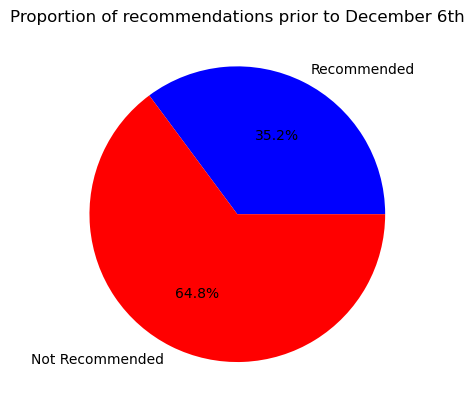

In [110]:
fig, ax = plt.subplots()
ax.pie(sizes1, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Proportion of recommendations prior to December 6th')
plt.show()

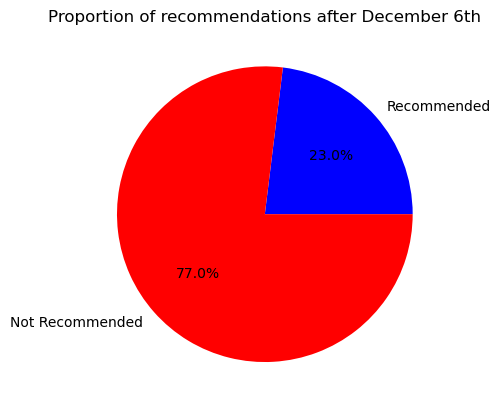

In [114]:
fig, ax = plt.subplots()
ax.pie(sizes2, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Proportion of recommendations after December 6th')
plt.show()

In [116]:
cats = ['Recommended', 'Not Recommended']

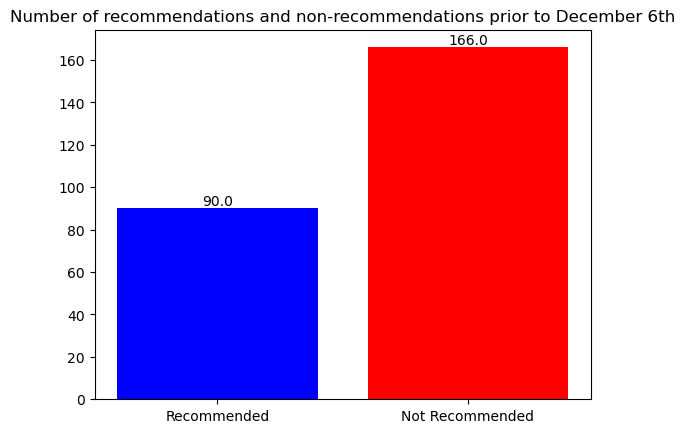

In [120]:
fig, ax = plt.subplots()
ax.bar(cats, sizes1)
bars = ax.bar(cats, sizes1, color = colors)

ax.set_title('Number of recommendations and non-recommendations prior to December 6th')

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}',
        ha='center', va='bottom'
    )

plt.show()

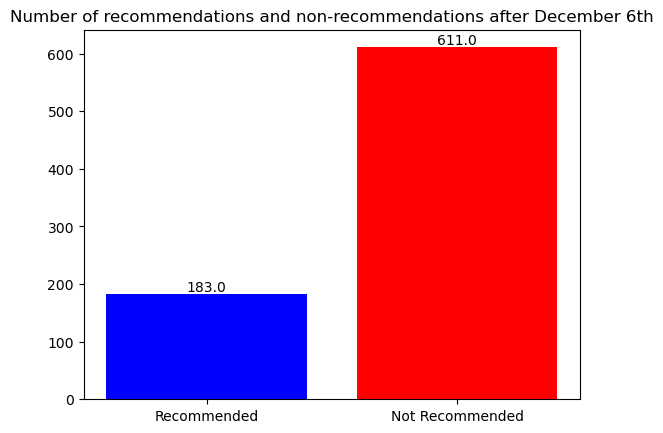

In [122]:
fig, ax = plt.subplots()
ax.bar(cats, sizes1)
bars = ax.bar(cats, sizes2, color = colors)

ax.set_title('Number of recommendations and non-recommendations after December 6th')

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}',
        ha='center', va='bottom'
    )

plt.show()

In [124]:
183/90

2.033333333333333

In [126]:
611/166

3.680722891566265

In [128]:
df_pre['polarity_scores'].mean()

-0.029147656250000004

In [130]:
df_post['polarity_scores'].mean()

-0.0986772040302267

In [132]:
pre_list = [score for score in df_pre['polarity_scores']]
post_list = [score for score in df_post['polarity_scores']]

def sign_counter(lst):
    pos = 0
    neg = 0
    zer = 0
    for num in lst:
        if num > 0:
            pos += 1
        if num < 0:
            neg += 1
        if num == 0:
            zer += 1
    return (pos, neg, zer)

In [134]:
sign_counter(pre_list)

(84, 96, 76)

In [136]:
sign_counter(post_list)

(235, 351, 208)

In [138]:
235/84

2.7976190476190474

In [140]:
351/96

3.65625

In [142]:
208/76

2.736842105263158

In [152]:
labels2 = 'Positive', 'Negative', 'Zero'
sizes3 = [84, 96, 76]
sizes4 = [235, 351, 208]
colors2 = ['blue', 'red', 'gray']

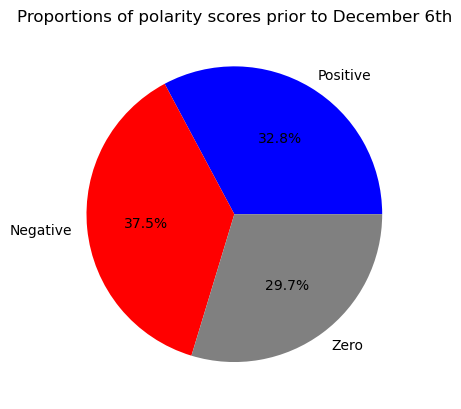

In [154]:
fig, ax = plt.subplots()
ax.pie(sizes3, labels=labels2, autopct='%1.1f%%', colors=colors2)
ax.set_title('Proportions of polarity scores prior to December 6th')
plt.show()

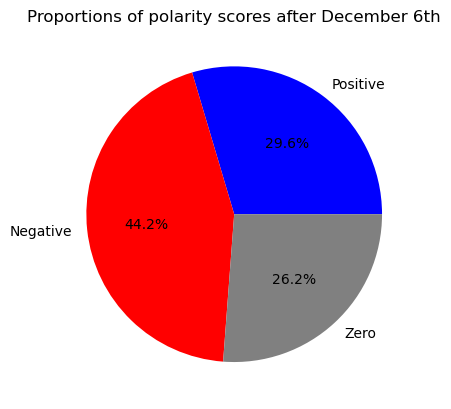

In [156]:
fig, ax = plt.subplots()
ax.pie(sizes4, labels=labels2, autopct='%1.1f%%', colors=colors2)
ax.set_title('Proportions of polarity scores after December 6th')
plt.show()